# RNA-sequencing Data Visualisation

*Science Park Study Group (07/05/19)* 
<span style="font-size:smaller;"><span style="font-size:smaller;">Fred White & Susanne Wilken

In [1]:
install.packages("ggplot2", repos = "https://cloud.r-project.org/")
install.packages("pheatmap", repos = "https://cloud.r-project.org/")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2", version = "3.8")

Installing package into 'C:/Users/world/R/win-library/3.5'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpqYcb5c\downloaded_packages


Installing package into 'C:/Users/world/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpqYcb5c\downloaded_packages


Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'DESeq2'
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'DESeq2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpqYcb5c\downloaded_packages


Update old packages: 'annotate', 'callr', 'caTools', 'cli', 'colorspace',
  'dplyr', 'e1071', 'evaluate', 'fs', 'geometry', 'ggfortify', 'ggsignif',
  'git2r', 'glue', 'gower', 'highr', 'igraph', 'imager', 'knitr', 'lava',
  'lazyeval', 'mRMRe', 'network', 'openssl', 'pkgbuild', 'polyclip',
  'processx', 'purrr', 'R.utils', 'R6', 'Rcpp', 'RCurl', 'recipes',
  'reticulate', 'rmarkdown', 'RMySQL', 'robustbase', 'rstudioapi', 'stringi',
  'stringr', 'svd', 'sys', 'tibble', 'tidyr', 'tinytex', 'xfun', 'XML',
  'httpuv', 'Matrix', 'mgcv', 'ModelMetrics', 'readxl', 'xts'


## Part 1 Preprocessing

In [2]:
library(ggplot2)
suppressMessages(library(DESeq2, quietly = T))

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'DESeq2' was built under R version 3.5.2"Warning message:
"package 'GenomeInfoDb' was built under R version 3.5.2"Warning message:
"package 'BiocParallel' was built under R version 3.5.2"

In [3]:
#counts <- read.table("C:/Users/world/RNAvis/counts.txt", header = T)
counts <- read.table("https://raw.githubusercontent.com/Fred-White94/RNAseqDataVis/master/data/counts.txt", sep = "\t", header = T)


In [4]:
counts[1:5,1:5]

Geneid,Chr,Start,End,Strand
AT1G01010.1,Chr1,3631,5899,+
AT1G01020.5,Chr1,6788,9130,-
AT1G01020.4,Chr1,6788,9130,-
AT1G01020.3,Chr1,6788,9130,-
AT1G01020.1,Chr1,6788,9130,-


In [5]:
dim(counts)

[1] 48359    12

In [6]:
head(counts)

Geneid,Chr,Start,End,Strand,Length,sub06_qc.bam,sub07_qc.bam,sub08_qc.bam,sub21_qc.bam,sub23_qc.bam,sub24_qc.bam
AT1G01010.1,Chr1,3631,5899,+,2269,0,0,6,6,3,11
AT1G01020.5,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.4,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.3,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.1,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.2,Chr1,6788,8737,-,1950,2,5,4,1,2,1


In [7]:
sampleinfo <- data.frame(cbind(c("Control_1","Control_2","Control_3","Drought_1","Drought_2","Drought_3"),c(rep("Control",3),rep("Drought",3))), stringsAsFactors = F)
colnames(sampleinfo) <- c("SampleName","Condition")

In [8]:
sampleinfo

SampleName,Condition
Control_1,Control
Control_2,Control
Control_3,Control
Drought_1,Drought
Drought_2,Drought
Drought_3,Drought


## Part 2 DESeq2 and PCA plot

### Differential Expression analysis with DESeq2

In [65]:
counts4DE <- counts[,c(1,7:12)]
colnames(counts4DE)[2:7] <- sampleinfo[,1]

In [66]:
head(counts4DE)

Geneid,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
AT1G01010.1,0,0,6,6,3,11
AT1G01020.5,2,5,4,1,2,1
AT1G01020.4,2,5,4,1,2,1
AT1G01020.3,2,5,4,1,2,1
AT1G01020.1,2,5,4,1,2,1
AT1G01020.2,2,5,4,1,2,1


In [67]:
numOverTen <- function(x) {sum(x > 10)}
ExpressionNum <- apply(counts4DE[2:7], 1, numOverTen)

In [68]:
length(ExpressionNum)

[1] 48359

In [69]:
head(ExpressionNum)
length(which(ExpressionNum > 2))

[1] 1 0 0 0 0 0

[1] 14900

In [70]:
counts4DE <- counts4DE[which(ExpressionNum > 2),]

In [78]:
DES <- DESeqDataSetFromMatrix(counts4DE, sampleinfo, ~ Condition, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"

In [79]:
DES

class: DESeqDataSet 
dim: 14900 6 
metadata(1): version
assays(1): counts
rownames(14900): AT1G01040.1 AT1G01040.2 ... ATMG00660.1 ATMG01320.1
rowData names(0):
colnames(6): Control_1 Control_2 ... Drought_2 Drought_3
colData names(2): SampleName Condition

In [80]:
DES <- DESeq(DES, parallel = T)

estimating size factors
estimating dispersions
gene-wise dispersion estimates: 2 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 2 workers


In [81]:
res <- results(DES, contrast = c("Condition","Control","Drought"))

In [82]:
res

log2 fold change (MLE): Condition Control vs Drought 
Wald test p-value: Condition Control vs Drought 
DataFrame with 14900 rows and 6 columns
                    baseMean     log2FoldChange             lfcSE
                   <numeric>          <numeric>         <numeric>
AT1G01040.1 10.4382953377469   1.82895972472448 0.618480116459014
AT1G01040.2 9.92569215999482   2.06992446489143 0.649388841731409
AT1G01050.1 22.8096412364819 -0.871460328194523 0.444718354031724
AT1G01050.2 22.0315240518752 -0.906561351374499 0.455727961409429
AT1G01080.2 28.9743318537279 0.0537514063189534 0.432122385080691
...                      ...                ...               ...
ATMG00090.1 77.3756117198807  -3.51455363125058 0.371429576070126
ATMG00160.1 49.9781787944633  -3.36318418826278 0.411618685805752
ATMG00510.1 11.7902063580962  -4.76767958539147 0.948606789744194
ATMG00660.1 10.0034178224615  -4.10714613315576 0.874409121954525
ATMG01320.1   8.136693777179  -3.76148487926676 0.889332266115424

In [83]:
length(which(!(is.na(res$padj))))

[1] 14899

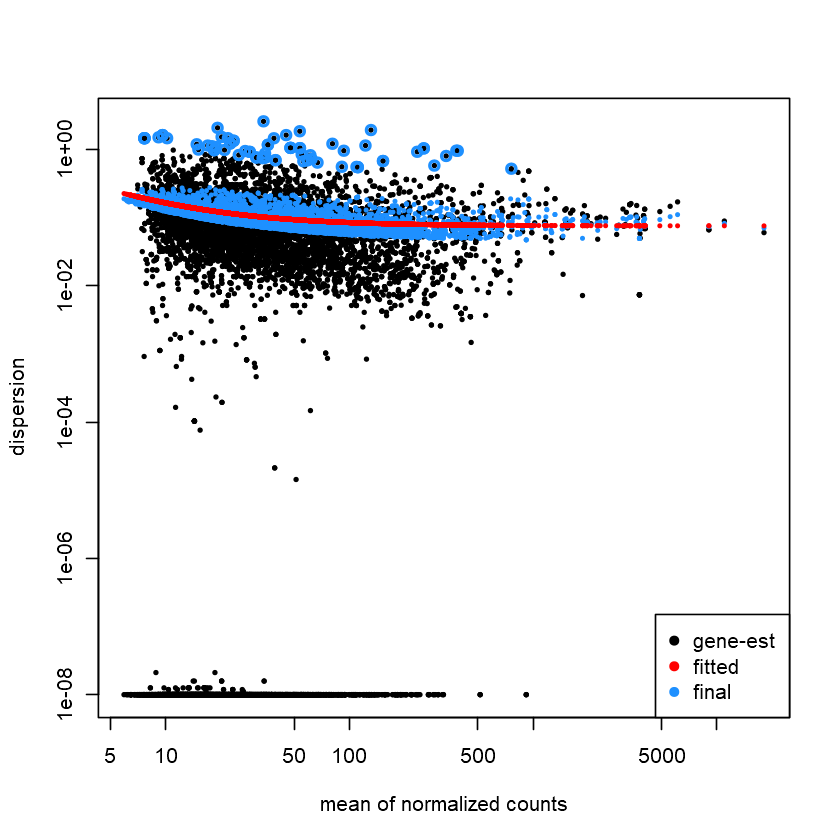

In [85]:
plotDispEsts(DES)

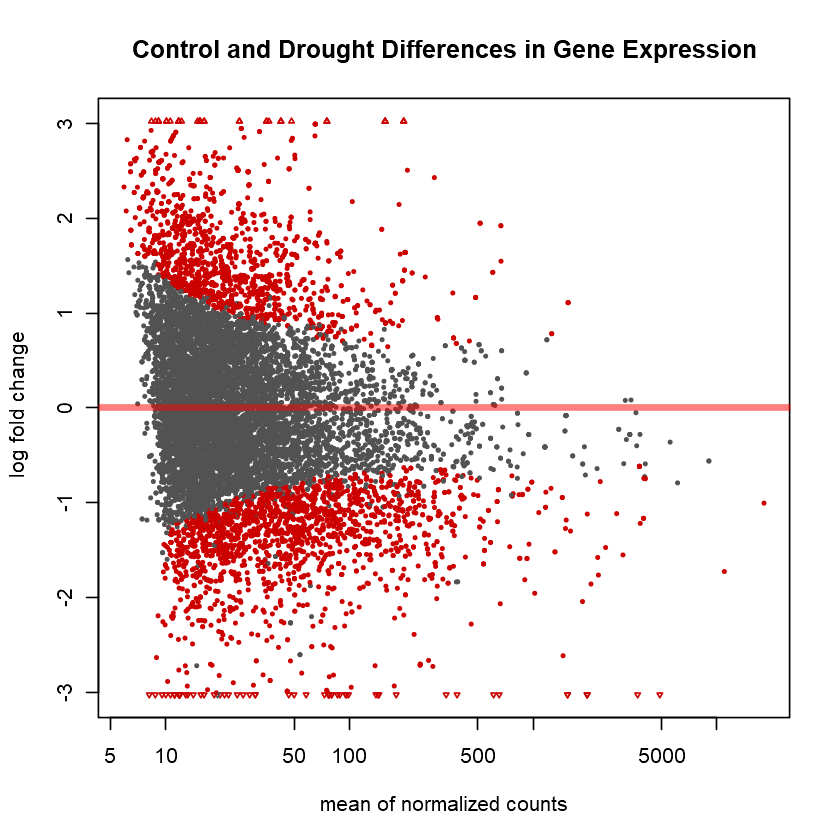

In [86]:
plotMA(res, main = "Control and Drought Differences in Gene Expression")

In [87]:
resordered <- res[order(res$padj),]
head(resordered)

log2 fold change (MLE): Condition Control vs Drought 
Wald test p-value: Condition Control vs Drought 
DataFrame with 6 rows and 6 columns
                    baseMean    log2FoldChange             lfcSE
                   <numeric>         <numeric>         <numeric>
ATCG00430.1 385.117391556477 -4.63364476719205 0.382832885708457
ATCG00470.1 3701.01373435315 -3.99806643347349  0.34114547555047
ATCG00220.1 144.613534183487 -4.70166557463189 0.410719063934424
ATCG00480.1 4887.30011942578  -4.0140494021105 0.361128952012319
ATCG00420.1 179.608568562705  -4.2751548626344 0.406366282598708
AT5G20250.4 156.294850500369    3.579962960162 0.358119288907434
                         stat               pvalue                 padj
                    <numeric>            <numeric>            <numeric>
ATCG00430.1 -12.1035703571212 1.01115696240284e-33 1.50652275828399e-29
ATCG00470.1 -11.7195352716381 1.01225761976189e-31 7.54081313841621e-28
ATCG00220.1 -11.4474003947929 2.42303326769184e-30 1.



**_Get rid of all NA adjusted p-values_**

In [88]:
resordered <- resordered[!is.na(resordered$padj),]
dim(resordered)

[1] 14899     6

In [115]:
normalised_counts <- counts(DES, normalized=TRUE)
head(normalised_counts)

,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
AT1G01040.1,15.21852,15.67988,17.942656,3.473659,5.299944,5.015112
AT1G01040.2,15.21852,15.67988,17.195046,3.473659,3.974958,4.012089
AT1G01050.1,14.37305,23.05865,11.214160,24.315613,31.799666,32.096714
AT1G01050.2,13.52757,23.05865,9.718939,24.315613,30.474680,31.093692
AT1G01080.2,43.11914,25.82569,19.437878,28.947158,34.449638,22.066491
AT1G01080.1,43.11914,25.82569,19.437878,28.947158,34.449638,22.066491


### PCA

,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
AT1G01040.1,0.7359247,0.80695190,1.155311,-1.072218904,-0.7910588,-0.8349094
AT1G01040.2,0.7872975,0.85592388,1.081302,-0.959726906,-0.8851597,-0.8796365
AT1G01050.1,-0.9741330,0.02875158,-1.338875,0.173887287,1.0380350,1.0723338
AT1G01050.2,-0.9708835,0.11726519,-1.405710,0.260771040,0.9639427,1.0346144
AT1G01080.2,1.6254503,-0.36182661,-1.095881,-0.003122699,0.6291946,-0.7938143
AT1G01080.1,1.6254503,-0.36182661,-1.095881,-0.003122699,0.6291946,-0.7938143


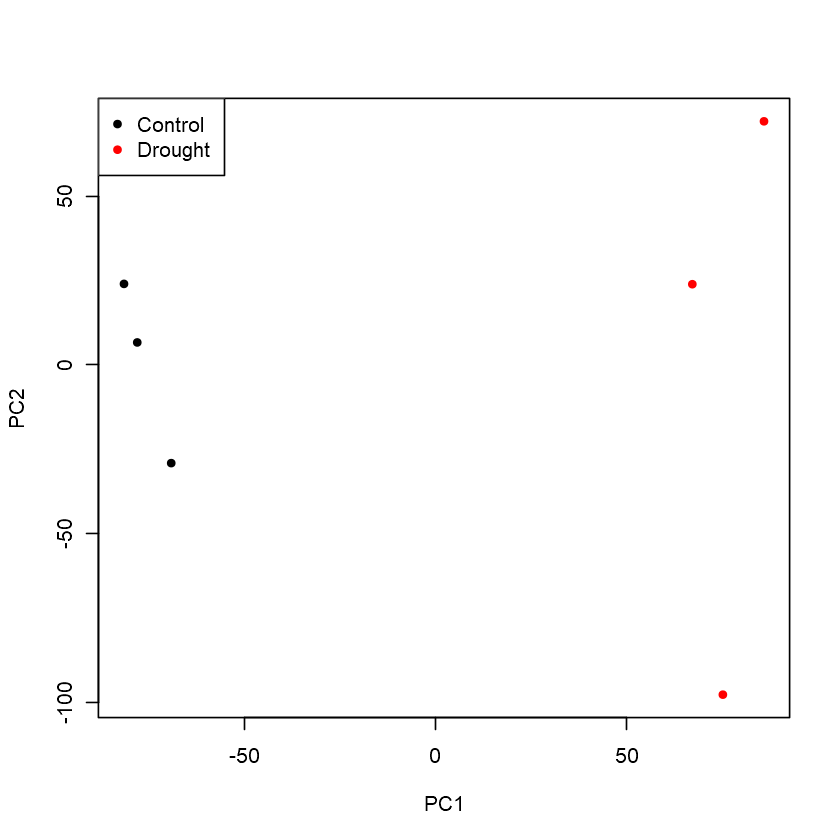

In [142]:
scaled.counts <- t(scale(t(normalised_counts)))

head(scaled.counts)

PCD <- prcomp(t(scaled.counts), center = T)


plot(PCD$x, pch = 20, col = as.factor(sampleinfo$Condition))

legend("topleft",legend = c("Control","Drought"), pch = 20, col = c(1,2))

## Part 3 Heatmap

In [143]:
library(pheatmap)

In [144]:
dim(scaled.counts[which(rownames(scaled.counts) %in% rownames(resordered)),])

[1] 14899     6

In [145]:
FC <- scaled.counts[which(rownames(scaled.counts) %in% rownames(resordered)),]

dim(FC)

[1] 14899     6

In [146]:
head(FC)

,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
AT1G01040.1,0.7359247,0.80695190,1.155311,-1.072218904,-0.7910588,-0.8349094
AT1G01040.2,0.7872975,0.85592388,1.081302,-0.959726906,-0.8851597,-0.8796365
AT1G01050.1,-0.9741330,0.02875158,-1.338875,0.173887287,1.0380350,1.0723338
AT1G01050.2,-0.9708835,0.11726519,-1.405710,0.260771040,0.9639427,1.0346144
AT1G01080.2,1.6254503,-0.36182661,-1.095881,-0.003122699,0.6291946,-0.7938143
AT1G01080.1,1.6254503,-0.36182661,-1.095881,-0.003122699,0.6291946,-0.7938143


In [147]:
FCf <- scaled.counts[which(rownames(scaled.counts) %in% rownames(resordered)[1:25]),]
dim(FCf)

[1] 25  6

In [148]:
head(FCf)

,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
AT1G10970.2,-0.7899516,-0.7575646,-0.7033967,0.02521257,0.4687233,1.75697701
AT1G10970.1,-0.7800691,-0.7456008,-0.7013624,-0.00598616,0.4644199,1.76859854
AT1G13930.1,-0.7855403,-0.8154351,-0.8235003,1.25508590,1.2095399,-0.04015019
AT1G13930.2,-0.7851969,-0.8155222,-0.8235852,1.25445295,1.2102930,-0.04044167
AT1G13930.3,-0.7851969,-0.8155222,-0.8235852,1.25445295,1.2102930,-0.04044167
AT1G31580.1,-0.9542542,-0.9325461,-0.8393511,0.95178728,0.7545859,1.01977819


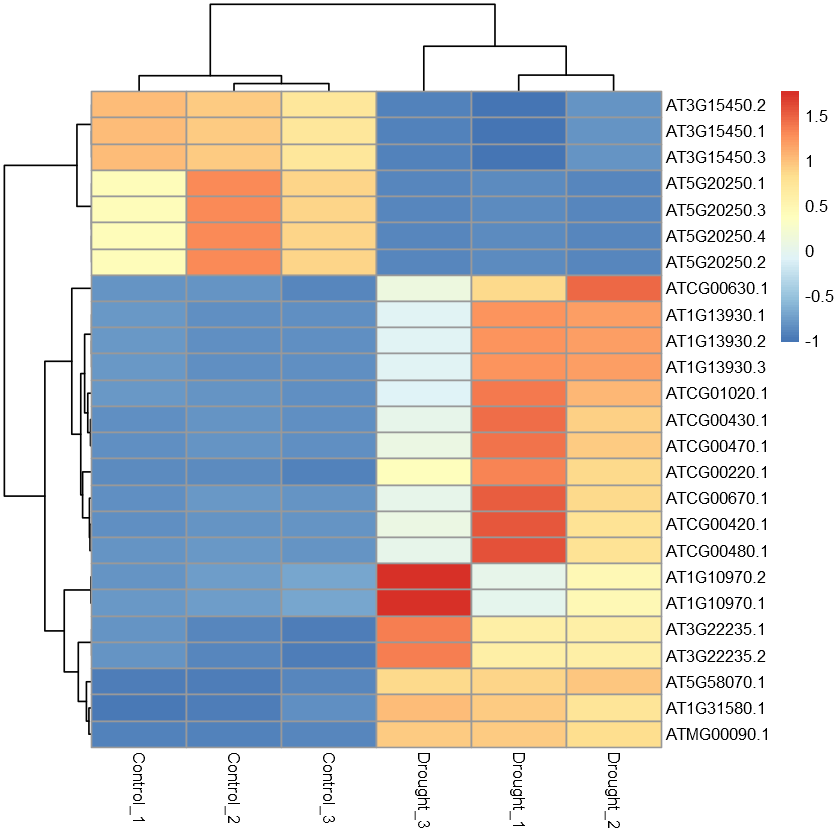

In [149]:
pheatmap(FCf)